In [121]:
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
from nltk import FreqDist
from bs4 import BeautifulSoup
from collections import Counter

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from wordcloud import WordCloud

In [20]:
url = "https://www.ippmedia.com/sw/nipashe"

In [21]:
response = requests.get(url)
html_content = response.text

In [28]:
soup = BeautifulSoup(html_content, "html.parser")
main_content = soup.find(id = "page")
blog = main_content.text.strip()

In [29]:
print (blog)

Ijumaa Machi 24, 2023




The Guardian
The Guardian On Sunday
Nipashe
Nipashe Jumapili
Financial Times




SWEN




Search form

Pekua Tovuti 










Search this site 




























 
 




















Mwanzo
Habari
Biashara
Michezo & Burudani
Maoni Ya Mhariri
Safu
Makala








 



 


NDANI YA NIPASHE LEO



 







 
 23Mar 2023
Na Mwandishi Wetu
Nipashe 
Read On 
 
 Dream Catcher Inatimiza Ndoto zako Gwiji!

Inakuaje pale ambapo ndoto unayoota inageuka na kuwa kweli! Hapo ndio utajua hujui au mjanja utakua wewe, pale Kasino ya mtandaoni ya Meridianbet unaweza kugeuza ndoto yako na kuwa kweli kupitia...  

 








Waziri wa Nchi, Ofisi ya Waziri Mkuu (Kazi, Vijana Ajira na Wenye Ulemavu), Prof. Joyce Ndalichako (aliyesimama) akimkaribisha Mtendaji Mkuu wa OSHA, Khadija Mwenda (hayupo pichani) ili atoe mada kuhusu Muundo na Majukumu ya OSHA mbele ya Wajumbe wa Kamati ya Kudumu ya Bunge ya Ustawi na Maendeleo ya Jamii katika Ukumbi wa Bunge Jijini Dodoma. Kul

In [34]:
blog = blog.lower()
blog = re.sub(r'[^\w\s]', '', blog )
blog = re.sub(r'[^\w\s]', '', blog)
blog = re.sub(r"\s+", " ", blog)
blog = re.sub(r'\d+', '', blog)

In [48]:
print(blog)

ijumaa machi the guardian the guardian on sunday nipashe nipashe jumapili financial times swen search form pekua tovuti search this site mwanzo habari biashara michezo burudani maoni ya mhariri safu makala ndani ya nipashe leo mar na mwandishi wetu nipashe read on dream catcher inatimiza ndoto zako gwiji inakuaje pale ambapo ndoto unayoota inageuka na kuwa kweli hapo ndio utajua hujui au mjanja utakua wewe pale kasino ya mtandaoni ya meridianbet unaweza kugeuza ndoto yako na kuwa kweli kupitia waziri wa nchi ofisi ya waziri mkuu kazi vijana ajira na wenye ulemavu prof joyce ndalichako aliyesimama akimkaribisha mtendaji mkuu wa osha khadija mwenda hayupo pichani ili atoe mada kuhusu muundo na majukumu ya osha mbele ya wajumbe wa kamati ya kudumu ya bunge ya ustawi na maendeleo ya jamii katika ukumbi wa bunge jijini dodoma kulia kwake ni naibu waziri wake patrobas katambi na kushoto kwake ni katibu mkuu wa ofisi yake prof jamal adam katundu mar na mwandishi wetu nipashe read on serikali 

In [56]:
blog_list = [blog]

In [59]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(blog_list)
y = (url)


In [62]:
X = X.toarray()

In [63]:
word_freq = X.sum(axis=0)

In [64]:
vocab = vectorizer.get_feature_names()

C:\Users\25475\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
sorted_idx = word_freq.argsort()[::-1]

In [66]:
top_words = [vocab[i] for i in sorted_idx[:10]]
top_freqs = [word_freq[i] for i in sorted_idx[:10]]

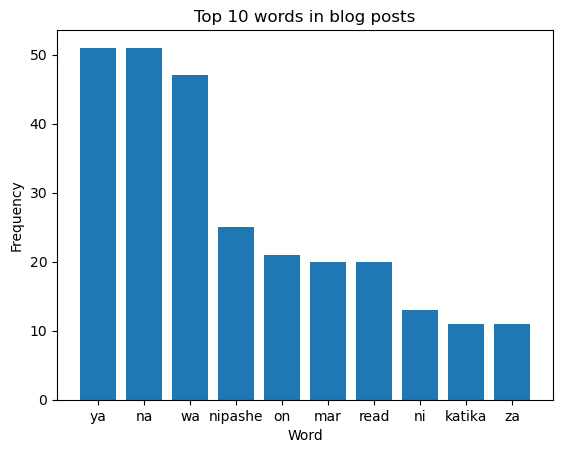

In [67]:
plt.bar(top_words, top_freqs)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 words in blog posts')
plt.show()

In [122]:
wordfreq=FreqDist(blog)

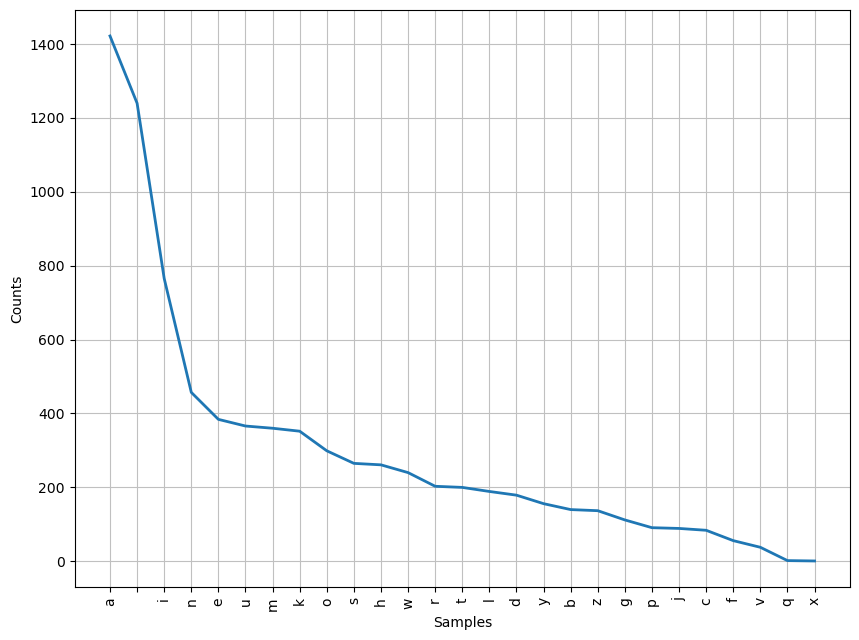

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [124]:
plt.figure(figsize=(10,7.5))
wordfreq.plot(50,cumulative=False)

In [87]:
text_blob = TextBlob(blog)
sentiment = text_blob.sentiment.polarity

In [113]:
def analyse_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [114]:
sentence=pd.DataFrame(sentence)

In [115]:
sentence['sentiment']=[str(analyse_sentiment(x)) for x in sentence.sentence]

In [116]:
sentiment_counts = sentence.sentiment.value_counts()

In [117]:
sentence.sentiment.value_counts()

Negative    1
Name: sentiment, dtype: int64

In [118]:
df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})

In [119]:
color_dict = {'positive': 'green', 'negative': 'red', 'neutral': 'gray','other':'blue'}

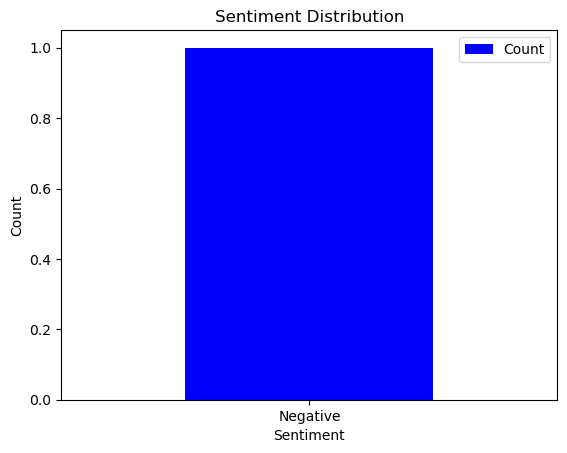

In [105]:
ax = df.plot.bar(x='Sentiment', y='Count', rot=0, color=[color_dict.get(sent, color_dict['other']) for sent in df.Sentiment])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution')

plt.show()

In [126]:
from nltk.tokenize import word_tokenize
blogwords = word_tokenize(blog)
blog_words = " ".join(blogwords)

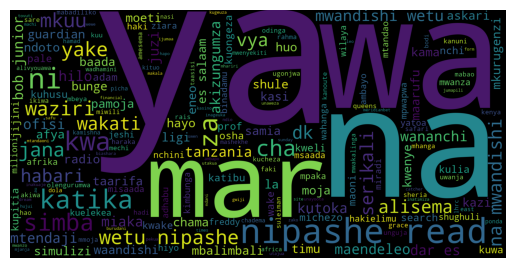

In [132]:
wordcloud=WordCloud(width=2000,height=1000).generate(blog)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()